<a href="https://colab.research.google.com/github/justincharney/Python_Machine_Learning/blob/main/PSS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#loading the data

In [ ]:
import numpy as np
from pathlib import Path

In [ ]:
# connect drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#path to folder
project_folder = Path('/content/gdrive/MyDrive/BIEN410_FinalProject')

In [ ]:
input_file = project_folder/'input_file/infile.txt'

#look at the text file
with open(input_file, 'r') as f:
  data = f.read(1000) # first 1000 characters
  print(data)

>d1dlwa | 116
SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTAAFLCAALGGPNAWTGRNLKEVHANMGVSNAQFTTVIGHLRSALTGAGVAAALVEQTVAVAETVRGDVVTV
>d2bkma | 128
EQWQTLYEAIGGEETVAKLVEAFYRRVAAHPDLRPIFPDDLTETAHKQKQFLTQYLGGPPLYTAEHGHPMLRARHLRFEITPKRAEAWLACMRAAMDEIGLSGPAREQFYHRLVLTAHHMVNTPDHLD
>d1asha | 147
ANKTRELCMKSLEHAKVDTSNEARQDGIDLYKHMFENYPPLRKYFKSREEYTAEDVQNDPFFAKQGQKILLACHVLCATYDDRETFNAYTRELLDRHARDHVHMPPEVWTDFWKLFEEYLGKKTTLDEPTKQAWHEIGREFAKEINK
>d4hswa | 137
GFKQDIATIRGDLRTYAQDIFLAFLNKYPDERRYFKNYVGKSDQELKSMAKFGDHTEKVFNLMMEVADRATDCVPLASDANTLVQMKQHSSLTTGNFEKFFVALVEYMRASGQSFDSQSWDRFGKNLVSALSSAGMK
>d1x9fd | 140
ECLVTESLKVKLQWASAFGHAHERVAFGLELWRDIIDDHPEIKAPFSRVRGDNIYSPEFGAHSQRVLSGLDITISMLDTPDMLAAQLAHLKVQHVERNLKPEFFDIFLKHLLHVLGDRLGTHFDFGAWHDCVDQIIDGIK
>d1x9fc | 149
HEHCCSEEDHRIVQKQWDILWRDTESSKIKIGFGRLLLTKLAKDIPEVNDLFKRVDIEHAEGPKFSAHALRILNGLDLAINLLDDPPALDAALDHLAHQHEVREGVQKAHFKKFGEILATGLPQVLDDYDALAWKSCLKGILTKISSRL
>d1jl7a | 147
GLSAAQRQVVASTWKDIAGADNGAGVGKECLSKFISAHPEMAAVFGFSGASDPGVAELGAKVLAQIGVAVSHLGDEGKM

In [ ]:
inputData = {}
with open(input_file, 'r') as f:
	while True:
		name = f.readline()
		seq = f.readline()
		if not seq: break
		inputData.update({name.rstrip():seq.rstrip()})

In [ ]:
list(inputData.values())

['SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTAAFLCAALGGPNAWTGRNLKEVHANMGVSNAQFTTVIGHLRSALTGAGVAAALVEQTVAVAETVRGDVVTV',
 'EQWQTLYEAIGGEETVAKLVEAFYRRVAAHPDLRPIFPDDLTETAHKQKQFLTQYLGGPPLYTAEHGHPMLRARHLRFEITPKRAEAWLACMRAAMDEIGLSGPAREQFYHRLVLTAHHMVNTPDHLD',
 'ANKTRELCMKSLEHAKVDTSNEARQDGIDLYKHMFENYPPLRKYFKSREEYTAEDVQNDPFFAKQGQKILLACHVLCATYDDRETFNAYTRELLDRHARDHVHMPPEVWTDFWKLFEEYLGKKTTLDEPTKQAWHEIGREFAKEINK',
 'GFKQDIATIRGDLRTYAQDIFLAFLNKYPDERRYFKNYVGKSDQELKSMAKFGDHTEKVFNLMMEVADRATDCVPLASDANTLVQMKQHSSLTTGNFEKFFVALVEYMRASGQSFDSQSWDRFGKNLVSALSSAGMK',
 'ECLVTESLKVKLQWASAFGHAHERVAFGLELWRDIIDDHPEIKAPFSRVRGDNIYSPEFGAHSQRVLSGLDITISMLDTPDMLAAQLAHLKVQHVERNLKPEFFDIFLKHLLHVLGDRLGTHFDFGAWHDCVDQIIDGIK',
 'HEHCCSEEDHRIVQKQWDILWRDTESSKIKIGFGRLLLTKLAKDIPEVNDLFKRVDIEHAEGPKFSAHALRILNGLDLAINLLDDPPALDAALDHLAHQHEVREGVQKAHFKKFGEILATGLPQVLDDYDALAWKSCLKGILTKISSRL',
 'GLSAAQRQVVASTWKDIAGADNGAGVGKECLSKFISAHPEMAAVFGFSGASDPGVAELGAKVLAQIGVAVSHLGDEGKMVAEMKAVGVRHKGYGNKHIKAEYFEPLGASLLSAMEHRIGGKMNAAAKDAWAAAYGDISGALISGLQS',
 

In [ ]:
#split the file based on new lines
data = [x for x in open(input_file).read().splitlines()]
#keep only the even entries (sequences) 
seqs = data[1::2]
len(seqs)

5326

In [ ]:
#get the targets/labels
label_file = project_folder/'training_data/labels.txt'

#look at the text file
with open(label_file, 'r') as f:
  data = f.read(1000) # first 1000 characters
  print(data)

>d1dlwa | 116
SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTAAFLCAALGGPNAWTGRNLKEVHANMGVSNAQFTTVIGHLRSALTGAGVAAALVEQTVAVAETVRGDVVTV
-HHHHH--HHHHHHHHHHHHHHHHH----HHHH----HHHHHHHHHHHHHHHH----------HHHHH------HHHHHHHHHHHHHHHHHH---HHHHHHHHHHHHHHHHHH---
>d2bkma | 128
EQWQTLYEAIGGEETVAKLVEAFYRRVAAHPDLRPIFPDDLTETAHKQKQFLTQYLGGPPLYTAEHGHPMLRARHLRFEITPKRAEAWLACMRAAMDEIGLSGPAREQFYHRLVLTAHHMVNTPDHLD
-----HHHHH-HHHHHHHHHHHHHHHHHH-----------HHHHHHHHHHHHHHHH----HHHHHH----HHHHHH-----HHHHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHH--------
>d1asha | 147
ANKTRELCMKSLEHAKVDTSNEARQDGIDLYKHMFENYPPLRKYFKSREEYTAEDVQNDPFFAKQGQKILLACHVLCATYDDRETFNAYTRELLDRHARDHVHMPPEVWTDFWKLFEEYLGKKTTLDEPTKQAWHEIGREFAKEINK
-HHHHHHHHHHHHH------HHHHHHHHHHHHHHHHH-HHHHHH--------HHHHHH-HHHHHHHHHHHHHHHHHHHH---HHHHHHHHHHHHHHHHH------HHHHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHHH-
>d4hswa | 137
GFKQDIATIRGDLRTYAQDIFLAFLNKYPDERRYFKNYVGKSDQELKSMAKFGDHTEKVFNLMMEVADRATDCVPLASDANTLVQMKQHSSLTTGNFEKFFVALVEYMRASGQSFDSQSWDRFGKNLVSALSSAGMK
-HHHHHHHHHHHHHHHHH

In [ ]:
#split the file based on new lines
label_data = [x for x in open(label_file).read().splitlines()] 
labels = label_data[2::3]
len(labels)

5326

#Load secondary data

In [ ]:
import pandas as pd
#path to other data
data = project_folder/'2018-06-06-ss.cleaned.csv'

df = pd.read_csv(data)
df.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
4,1B2H,B,KAK,CBC,CEC,3,False


In [ ]:
maxlen_seq=np.inf
input_seqs, target_seqs = df[['seq', 'sst3']][(df.len <= maxlen_seq) & (~df.has_nonstd_aa)].values.T
input_seqs.shape, target_seqs.shape

((386333,), (386333,))

In [ ]:
ys = target_seqs.tolist()
ys = ys[:len(ys)//2]
Xs = input_seqs.tolist()
Xs = Xs[:len(Xs)//2]

In [ ]:
# change from 3 state to 2 state (H or -)
new_ys = []
for s in ys:
  r = s.replace('C', '-')
  r = r.replace('E', '-')
  new_ys.append(r)

#Process data

In [ ]:
class Preprocessor():
  def __init__(self):
    self.seq_dct = None
    self.label_dct = None
    self.flatX = None
    self.flatY = None
    self.flatYoh = None

  def encode(self, sequence_list:list, dct):
    """ Takes in a list of sequences and returns a 
    list of sequences after numerically encoding"""
    seqs2int = []
    #nested = any(isinstance(i, list) for i in sequence_list) # check if list is nested or not
    for seq in sequence_list:
      ints=[]
      for i in list(seq):
        ints.append(list(dct.values()).index(i))
      seqs2int.append(ints)
    return seqs2int
  
  def flatten(self, l:list):
    """Takes in a list of lists and flattens it"""
    return [item for sublist in l for item in sublist]
  
  def transformX(self, seqs:list, N=15):
    """Takes in a sequence string or list of strings and creates input for NB model"""
    aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    dct = dict(enumerate(aas)) # create a dictionary of ammino acids
    self.seq_dct = dct
    enc = self.encode(seqs, dct)
    flat = self.flatten(enc)
    self.flatX = flat
    new_seq = flat.copy()
    #pad with N-1 dummy tokens (20)
    new_seq.extend([20]*(N-1))
    toks = [new_seq[i:i+N] for i in range(len(new_seq)-N+1)]
    return np.array(toks)
  
  def labeldict(self, y:list):
    set_labels = set([])
    for l in y:
      for seq in l:
        for char in list(seq):
          set_labels.add(char.lower())
    label2idx = {l: i for i, l in enumerate(list(set_labels))}
    self.label_dct = label2idx
    return label2idx

  def encodeY(self, arr, dict):
    seqs2int = []
    for lst in arr:
      ints = []
      for i in list(lst):
        ints.append(dict[i.lower()])
      seqs2int.append(ints)
    return seqs2int
  
  def one_hot(self, np_arr, categories=2):
    cat_seqs = []
    for idx, label in np.ndenumerate(np_arr):
      cat_seqs.append(np.zeros(categories))
      cat_seqs[-1][label] = 1.0
    return np.array(cat_seqs)
  
  def transformY(self, labels:list):
    label_dict = self.labeldict(labels)
    enc_y = self.encodeY(labels, label_dict)
    flat_y = self.flatten(enc_y)
    self.flatY = flat_y
    oh_y = self.one_hot(np.array(flat_y))
    self.flatYoh = oh_y
    return oh_y

In [ ]:
pre = Preprocessor()
X = pre.transformX(seqs)
print(X.shape)
y = pre.transformY(labels)
y.shape

(1147861, 15)


(1147861, 2)

In [ ]:
# train and test split with numpy
N, D = X.shape

np.random.seed(42) # for reproducibility
inds = np.random.permutation(N)

# need to use smaller size for Neural Network (0.25)
size = int(N*0.75)

#split the dataset into train and test
X_train, y_train = X[inds[:size]], y[inds[:size]]
X_test, y_test = X[inds[size:]], y[inds[size:]]

#X_train, y_train = X[inds[:size]], y[inds[:size]]
#X_test, y_test = X[inds[size:]], y[inds[size:]]

from sklearn.model_selection import train_test_split
#create training and testing splits
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.2, random_state=42)

#do the same for the non-tokenized data
#seq_train, target_train = np.array(seqs)[inds[:size]], np.array(labels)[inds[:size]]
#seq_test, target_test = np.array(seqs)[inds[size:]], np.array(labels)[inds[size:]]

#Categorical Naive Bayes

In [ ]:
class CNB():
  def __init__(self):
    self.log_probs = []
    self.prior_probs = None
    self.count_matrix = []
    self.n_features = None
    self.class_count = None
    self.log_probs = []
    self.classes = np.array([0,1])
    
  def fit(self, X, y, alpha=1e-3):
    self.n_features = X.shape[1]
    n_classes = y.shape[1]

    unique_categories = np.unique(X)

    for i in range(self.n_features):
      feature_count = []
      feature = X[:,i]
      for j in range(n_classes):
        mask = y[:,j].astype(bool)
        counts = np.bincount(feature[mask], minlength=len(unique_categories))
        feature_count.append(counts)
      self.count_matrix.append(np.array(feature_count))
      self.class_count = y.sum(axis=0)
    
    for i in range(self.n_features):
      num = self.count_matrix[i] + alpha
      den = num.sum(axis=1).reshape(-1,1)
      log_prob = np.log(num) - np.log(den)
      self.log_probs.append(log_prob)
    
    self.prior_probs = np.log(self.class_count) - np.log(self.class_count.sum())

  def predict(self, test_sample):
    probs = np.zeros((1,2))

    for i in range(self.n_features):
      category = test_sample[i]
      probs += self.log_probs[i][:, category]
    
    probs += self.prior_probs
    return self.classes[np.argmax(probs)]
      

In [ ]:
cnb = CNB()
cnb.fit(X_train,y_train)

In [ ]:
n_features = cnb.n_features
log_probs = cnb.log_probs
prior_probs = cnb.prior_probs
classes = cnb.classes

#Saving and loading from txt file

In [ ]:
# turn into list or nested list
log_probs_list = [arr.tolist() for arr in log_probs]
prior_probs_list = prior_probs.tolist()

# save np arrays to txt file
save_lists = [log_probs_list, prior_probs_list]

In [ ]:
# save list versions of numpy arrays
with open('ps.txt', 'w') as filehandle:
    for listitem in save_lists:
        filehandle.write('%s\n' % listitem)

In [ ]:
# define an empty list
arrays = []

# open file and read the content in a list
with open('ps.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        l = line[:-1]

        # add item to the list
        arrays.append(l)

In [ ]:
arrays

['[[[-2.165916287717982, -2.8225793020967203, -3.396960994007747, -2.979264143158531, -4.550469845966253, -3.068174194928492, -2.3875764032315523, -3.336587989033415, -3.8529065675068708, -2.833400367203657, -2.1114601542436517, -2.7190289601918938, -3.800333460547975, -3.1795070019935707, -3.713539869197998, -3.0031724439722893, -3.174673198391435, -4.222331068286463, -3.38783803305161, -2.7831185658207342, -19.65107253616639], [-2.767139294943753, -3.0790865523361646, -3.049395098180522, -2.7422012542208662, -4.2930850375439675, -3.5016301732248962, -2.9381480526104493, -2.334553891391142, -3.69973174641728, -2.814512935592692, -2.5495338845156734, -2.9685671020434743, -4.138450643496451, -3.1768937652123306, -2.8059599887168343, -2.7404072636603036, -2.7848142163192176, -4.347607085095703, -3.3374434201527006, -2.5422055024984314, -20.066716743074853]], [[-2.1872180752622477, -2.803594163845373, -3.293172814322551, -2.991932424644091, -4.49557310811012, -3.059479304426068, -2.440650

In [ ]:
import ast
l1 = ast.literal_eval(arrays[0])
log_probs = [np.array(l) for l in l1]
log_probs

[array([[ -2.16591629,  -2.8225793 ,  -3.39696099,  -2.97926414,
          -4.55046985,  -3.06817419,  -2.3875764 ,  -3.33658799,
          -3.85290657,  -2.83340037,  -2.11146015,  -2.71902896,
          -3.80033346,  -3.179507  ,  -3.71353987,  -3.00317244,
          -3.1746732 ,  -4.22233107,  -3.38783803,  -2.78311857,
         -19.65107254],
        [ -2.76713929,  -3.07908655,  -3.0493951 ,  -2.74220125,
          -4.29308504,  -3.50163017,  -2.93814805,  -2.33455389,
          -3.69973175,  -2.81451294,  -2.54953388,  -2.9685671 ,
          -4.13845064,  -3.17689377,  -2.80595999,  -2.74040726,
          -2.78481422,  -4.34760709,  -3.33744342,  -2.5422055 ,
         -20.06671674]]),
 array([[ -2.18721808,  -2.80359416,  -3.29317281,  -2.99193242,
          -4.49557311,  -3.0594793 ,  -2.44065095,  -2.91779119,
          -3.79148845,  -2.8491227 ,  -2.11578964,  -2.71165635,
          -3.79798451,  -3.17852434,  -4.54798331,  -2.98531795,
          -3.19457786,  -4.281848  ,  -3

In [ ]:
prior_probs = np.array(ast.literal_eval(arrays[1]))
prior_probs

array([-0.92241063, -0.5067664 ])

#CNB prediction

In [ ]:
pre.label_dct

In [ ]:
from tqdm import tqdm

def predict(query_point, log_probs, prior_probs, classes=np.array([0,1])):
  probs = np.zeros((1, 2)) # for 2 classes
  
  for i in range(n_features): # num_features
    # get the category id from the query point
    category = query_point[i]
    probs += log_probs[i][:,category]
  
  #add prior
  probs+= prior_probs

  return np.argmax(probs) #classes[np.argmax(probs)]

In [ ]:
preds = []

for aa in X_test:
  preds.append(predict(aa, log_probs, prior_probs))
  #preds.append(cnb.predict(aa))

In [ ]:
print(f'Testing Accuracy: {(np.array(preds) == np.argmax(y_test, axis=1)).mean()}')

Testing Accuracy: 0.6946635710645416


In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

In [ ]:
import matplotlib.pyplot as plt

test_accs = []
ns = list(range(1,15))

for i in range(1,15):
  pre = Preprocessor()
  #pre-process with different N-gram
  X = pre.transformX(seqs, N=i)
  N, D = X.shape
  # need to use smaller size for Neural Network (0.25)
  size = int(N*0.75)
  #split the dataset into train and test
  X_train, y_train = X[inds[:size]], y[inds[:size]]
  X_test, y_test = X[inds[size:]], y[inds[size:]]
  cnb = CNB()
  #fit with new data
  cnb.fit(X_train,y_train)

  preds = []

  for aa in X_test:
    preds.append(cnb.predict(aa))
  
  test_accs.append((np.array(preds) == np.argmax(y_test, axis=1)).mean())

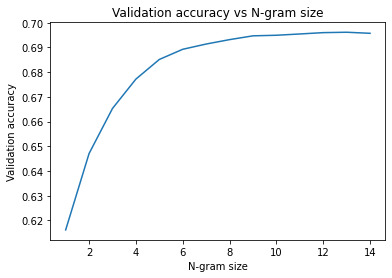

In [ ]:
plt.plot(ns, test_accs)
plt.xlabel("N-gram size")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy vs N-gram size")
plt.show()

In [ ]:
def to_seq(seq, dct):
  s = ''
  for i in seq:
    s+=dct[i]
  return s

In [ ]:
N = 1
reverse_decoder_index = {value:key for key,value in pre.label_dct.items()}

for i in range(N):
  seq = seqs[i]
  x_i = pre.transformX(seq)
  x_i_preds = []
  for aa in x_i:
    x_i_preds.append(predict(aa, log_probs, prior_probs))

  print("---")
  print("Input: " + str(seqs[i]))
  print("Target: " + str(labels[i]))
  print("Result: " + str(to_seq(x_i_preds, reverse_decoder_index).upper()))
  print()


---
Input: SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTAAFLCAALGGPNAWTGRNLKEVHANMGVSNAQFTTVIGHLRSALTGAGVAAALVEQTVAVAETVRGDVVTV
Target: -HHHHH--HHHHHHHHHHHHHHHHH----HHHH----HHHHHHHHHHHHHHHH----------HHHHH------HHHHHHHHHHHHHHHHHH---HHHHHHHHHHHHHHHHHH---
Result: -HHHH---HHHHH--HH-H-H-HHH-------------------HHH-HHHH---------H-HH---H-----HH-------H-HHH-----HHHH-HH---HHH----------



In [ ]:
randomPredictions = {}
for name in inputData:
  seq = inputData[name]
  x_i = Preprocessor().transformX(seq)
  x_i_preds = []
  for aa in x_i:
    x_i_preds.append(predict(aa, log_probs, prior_probs))
  randomPredictions.update({name:str(to_seq(x_i_preds, reverse_decoder_index).upper())})

#Pre-Processing for NN

In [ ]:
# function to pad or truncate list to specific length
pad = lambda a,i : a[0:i] if len(a) > i else a + [0] * (i-len(a))

class PreprocessorLSTM:
  def __init__(self):
    self.ngrams = None
    self.ngram_dict = None
  
  def transform(self):
    seqs2int = []
    #for lst in self.ngrams:
    ints = []
    for i in self.ngrams:
      # MADE CHANGE TO HANDLE OUT OF VOCABULARY words - encode as UNK token 
      if i.lower() in self.ngram_dict:
        ints.append(self.ngram_dict[i.lower()])
      else:
        ints.append(self.ngram_dict['unk'])
      seqs2int.append(ints)
    return ints

  
  def fit(self, seqs, dct, N=3):
    ngrams = np.array([seqs[i:i+N] for i in range(len(seqs))], dtype=object) # split into ngrams
    self.ngrams = ngrams
    #ngram_dict = self.tokenize(ngrams)
    self.ngram_dict = dct
    train_X = self.transform()
    #print(train_X)
    #padded to a length of 1419
    padded = pad(train_X, 1419)
    #print(padded)
    np_train_X = np.array(padded)
    return np_train_X


In [ ]:
ngrams = np.array([[seq[i:i+3] for i in range(len(seq))] for seq in seqs], dtype=object) # creat ngrams from input training data

def tokenize(arr):
  set_ngrams = set([])
  for lst in arr:
    for ngram in lst:
      set_ngrams.add(ngram.lower())

  ngram2idx = {ng: i+1 for i, ng in enumerate(list(set_ngrams))}
  return ngram2idx

ngram_dict = tokenize(ngrams)

def transform(arr, dict):
  seqs2int = []
  for lst in arr:
    ints = []
    for i in lst:
      ints.append(dict[i.lower()])
    seqs2int.append(ints)
  return seqs2int

train_X = transform(ngrams, ngram_dict) # now all the ngrams are tokenized

In [ ]:
#add unknown key and value to dict corresponding to a new value
ngram_dict['unk'] = 8413

In [ ]:
# function to pad or truncate list to specific length
pad = lambda a,i : a[0:i] if len(a) > i else a + [0] * (i-len(a))

In [ ]:
padded = []

for l in train_X:
  pl = pad(l, 1419)
  padded.append(pl)

In [ ]:
np_train_X = np.array(padded)

In [ ]:
def char_tokenizer(lst): # pass in a list of the labels
  set_labels = set([])
  for l in lst:
    for seq in l:
      for char in list(seq):
        set_labels.add(char.lower())
  label2idx = {l: i+1 for i, l in enumerate(list(set_labels))}
  return label2idx 

label_dict = char_tokenizer(labels) # fit the labels

train_y = transform(labels, label_dict) #labels are now tokenized

padded_y = []
for l in train_y:
  pl = pad(l, 1419)
  padded_y.append(pl)

np_train_y = np.array(padded_y)

In [ ]:
#now we need to one hot encode the labels
def to_categorical(np_arr, categories):
    cat_sequences = []
    for s in np_arr:
        cats = []
        for idx, item in np.ndenumerate(s):
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

#oh_y_train = to_categorical(np_train_y, 3) # 3 categories since '-, H, 0' for the padding

In [ ]:
oh_y_train = np.eye(3)[np_train_y] # 3 categories since '-, H, 0' for the padding

In [ ]:
from sklearn.model_selection import train_test_split
#create training and testing splits
X_train, X_test, y_train, y_test = train_test_split(np_train_X, oh_y_train, 
                                                    test_size=0.25, random_state=42)
#doing the same for non-tokenized data
seq_train, seq_test, target_train, target_test = train_test_split(seqs, labels, 
                                                    test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((3994, 1419), (3994, 1419, 3))

In [ ]:
#append missing value
#ngram_dict['mwm'] = 8413

#LSTM Model

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Embedding, Activation, SimpleRNN, GRU, BatchNormalization, LSTM, TimeDistributed, Masking
from tensorflow.keras.optimizers import Adam

In [ ]:
n_words = len(ngram_dict) + 1 #plus 1 for the padding token 0
max_length = 1419

model = Sequential()
#model.add(Masking(mask_value=0, input_shape=(max_length,)))
model.add(Embedding(input_shape=(max_length,), input_dim=n_words, output_dim=4))
model.add(LSTM(4, return_sequences=True))
#model.add(BatchNormalization())
model.add(TimeDistributed(Dense(3, activation='softmax')))

In [ ]:
#we need to calculate accuracy that ignores the padding
import tensorflow as tf
from keras import backend as K

def wo_pad_acc(y_true, y_pred):
  y = tf.argmax(y_true, axis=-1)
  y_ = tf.argmax(y_pred, axis=-1)
  mask = tf.greater(y, 0)
  return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.08),
              metrics=['accuracy', wo_pad_acc])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1419, 4)           33656     
                                                                 
 lstm (LSTM)                 (None, 1419, 4)           144       
                                                                 
 time_distributed (TimeDistr  (None, 1419, 3)          15        
 ibuted)                                                         
                                                                 
Total params: 33,815
Trainable params: 33,815
Non-trainable params: 0
_________________________________________________________________


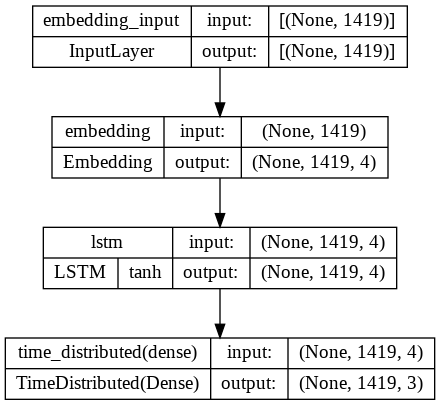

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
model.fit(X_train,y_train,epochs=4, validation_data=(X_test, y_test), verbose=1)

Epoch 1/4
125/125 [==============================] - 9s 46ms/step - loss: 0.1176 - accuracy: 0.9393 - wo_pad_acc: 0.6433 - val_loss: 0.0898 - val_accuracy: 0.9546 - val_wo_pad_acc: 0.7068
Epoch 2/4
125/125 [==============================] - 5s 40ms/step - loss: 0.0846 - accuracy: 0.9577 - wo_pad_acc: 0.7197 - val_loss: 0.0877 - val_accuracy: 0.9548 - val_wo_pad_acc: 0.7079
Epoch 3/4
125/125 [==============================] - 5s 40ms/step - loss: 0.0818 - accuracy: 0.9595 - wo_pad_acc: 0.7320 - val_loss: 0.0885 - val_accuracy: 0.9539 - val_wo_pad_acc: 0.7019
Epoch 4/4
125/125 [==============================] - 5s 40ms/step - loss: 0.0809 - accuracy: 0.9602 - wo_pad_acc: 0.7362 - val_loss: 0.0877 - val_accuracy: 0.9558 - val_wo_pad_acc: 0.7144


In [ ]:
preds = model.predict(np_train_X)

167/167 [==============================] - 3s 18ms/step


In [ ]:
np.argmax(preds[0], axis=1)

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
#np.argmax(preds, axis=2).flatten().shape

(7557594,)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

m = confusion_matrix(np.argmax(oh_y_train,axis=2).flatten(), np.argmax(preds, axis=2).flatten())
m

array([[6409733,       0,       0],
       [     12,  229688,  226323],
       [    171,   73934,  617733]])

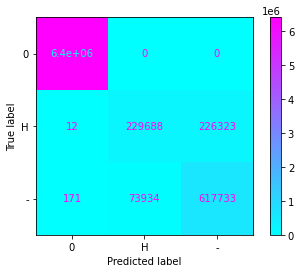

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(m, display_labels = np.array(["0", "H", "-"])).plot(cmap="cool")

In [ ]:
def onehot_to_seq(oh_seq, index, seq_len):
    s = ''
    max_len = 1419
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            s += 'H' # predict helix
            #pass
    if seq_len > max_len:
      return s[:max_len]
    else:
      return s[:seq_len]
    #return s

#LSTM Numpy

In [ ]:
def better_softmax(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats.
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter,
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)

    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p

In [ ]:
# get the layers of the model
emb = model.get_layer('embedding')
l = model.get_layer('lstm')
dense = model.get_layer('time_distributed')
#bn = lstm.get_layer(index=2) # ensure this is the right index

#get the weights in the layers
w_e = emb.get_weights()[0]
w_, b_ = dense.get_weights()

#parameters for batch norm
#gamma, beta, mean, std = bn.get_weights()
#eps = 1e-3

#l.get_weights()[0].shape, l.get_weights()[1].shape, l.get_weights()[2].shape

units = int(int(model.layers[1].trainable_weights[0].shape[1])/4)
print("No units: ", units)

No units:  4


In [ ]:
# get all the weights for the LSTM
W = model.layers[1].get_weights()[0]
U = model.layers[1].get_weights()[1]
b = model.layers[1].get_weights()[2]

#These are all the weight arrays for LSTM
W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

In [ ]:
W.shape, U.shape, b.shape, w_e.shape, w_.shape, b_.shape

((4, 16), (4, 16), (16,), (8414, 4), (4, 3), (3,))

In [ ]:
W_rounded = [[round(i, 4) for i in l] for l in W.tolist()]
U_rounded = [[round(i, 4) for i in l] for l in U.tolist()]
B_rounded = list(np.round(b,4))

w_e_rounded = [[round(i, 4) for i in l] for l in w_e.tolist()]
w_rounded = [[round(i, 4) for i in l] for l in w_.tolist()]
b_rounded = list(np.round(b_,4))

#Save and load LSTM weights

In [ ]:
save_lists = [W_rounded, U_rounded, B_rounded, w_e_rounded, w_rounded, b_rounded, ngram_dict]

In [ ]:
# save list versions of numpy arrays
with open('parameters.txt', 'w') as filehandle:
    for listitem in save_lists:
        filehandle.write('%s\n' % listitem)

In [ ]:
# define an empty list
arrays = []

# open file and read the content in a list
with open('parameters.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        l = line[:-1]

        # add item to the list
        arrays.append(l)

In [ ]:
import ast
W = np.array(ast.literal_eval(arrays[0]))
U = np.array(ast.literal_eval(arrays[1]))
b = np.array(ast.literal_eval(arrays[2]))
w_e = np.array(ast.literal_eval(arrays[3]))
w_ = np.array(ast.literal_eval(arrays[4]))
b_ = np.array(ast.literal_eval(arrays[5]))
ngram_dict = ast.literal_eval(arrays[6])

In [ ]:
#These are all the weight arrays for LSTM
W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

#Predict LSTM

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def embed(x):
  return w_e[x,:]

def softmax(x):
    z = x - np.max(x, axis=-1, keepdims=True)
    numerator = np.exp(z)
    denominator = np.sum(numerator, axis=-1, keepdims=True)
    softmax = numerator / denominator
    return softmax

def forward_LSTM(H_in, out_dim=32, batch_size=1):
  L = H_in.shape[0] # sequence length

  #calculate lstm output
  output = []
  h = np.zeros((1, batch_size, out_dim))
  c = np.zeros((1, batch_size, out_dim))
  for t in range(L):
    f = sigmoid(H_in[t]@W_f + h@U_f + b_f)
    i = sigmoid(H_in[t]@W_i + h@U_i + b_i)
    n = np.tanh(H_in[t]@W_c + h@U_c + b_c)
    o = sigmoid(H_in[t]@W_o + h@U_o + b_o)

    c = i*n + f*c
    h = o*np.tanh(c)
    output.append(h)

  return np.vstack(output)

In [ ]:
from tqdm import tqdm
def predict_LSTM(X:np.ndarray):
  outputs = []
  for s in range(X.shape[0]): # for each sample in dataset
    l0 = embed(X[s])
    l1 = forward_LSTM(l0, 4)
    l2 = np.dot(l1, w_) + b_
    #print(l2.shape)
    #l2 = better_softmax(l2, axis=2)
    l2 = softmax(l2)
    l2 = l2.reshape((1419,3))
    outputs.append(l2)
    #outputs.append(np.argmax(l2, axis=1))
  return outputs

In [ ]:
train_preds = predict_LSTM(X_train[:10])

In [ ]:
label_dict

{'h': 1, '-': 2}

In [ ]:
np.argmax(train_preds[1], axis=1).tolist()

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
reverse_decoder_index = {value:key for key,value in label_dict.items()}

def show_results(x, y, y_):
    print("---")
    print("Input: " + str(x))
    print("Target: " + str(onehot_to_seq(y, reverse_decoder_index).upper()))
    print("Result: " + str(onehot_to_seq(y_, reverse_decoder_index).upper()))

In [ ]:
# look at results
N = 5

for i in range(N):
  show_results(seq_train[i], y_train[i], np.array(train_preds)[i])

---
Input: TSFEDYTYHFEKGNDLVLGSHLEVCPSIAVEEKPILDVQHLGIGGKDDPARLIFNTQTGPAIVASLIDLGDRYRLLVNCIDTVKTPHSLPKLPVANALWKAQPDLPTASEAWILAGGAHHTVFSHALNLNDRQFAEHDIEITVIDNDTRLPAFKDALRWNEVYYGF


TypeError: ignored

In [ ]:
x_i = X_test[0] #PreprocessorLSTM().fit(seqs[0])
pred = predict_LSTM(x_i.reshape(1,1419))
np.array(pred).squeeze()

array([[7.25060728e-03, 1.80380175e-01, 8.12369218e-01],
       [6.30045718e-05, 8.40024658e-02, 9.15934530e-01],
       [2.21334365e-05, 3.27369840e-01, 6.72608026e-01],
       ...,
       [9.99978454e-01, 9.68053579e-06, 1.18653616e-05],
       [9.99978454e-01, 9.68053579e-06, 1.18653616e-05],
       [9.99978454e-01, 9.68053579e-06, 1.18653616e-05]])

In [ ]:
reverse_decoder_index = {value:key for key,value in label_dict.items()}
randomPredictions = {}
for name in list(inputData.keys())[:5]:
  seq = inputData[name]
  x_i = PreprocessorLSTM().fit(seq, ngram_dict)
  pred = predict_LSTM(x_i.reshape(1,1419)) # get the prediction for the sequence

  #x_i_preds = []
  #for aa in x_i:
    #x_i_preds.append(predict(aa, log_probs, prior_probs))
  randomPredictions.update({name:str(onehot_to_seq(np.array(pred).squeeze(), reverse_decoder_index, len(seq)).upper())})

In [ ]:
randomPredictions

{'>d1dlwa | 116': '---HH-----HHHHHHHHHHHHH-H--HH----------------HHHHHHHH-------------------------------HHHHHH----HHHHHHHHHHHHHHH-------',
 '>d2bkma | 128': '------HHH------HHHHHHHHHHHHHH-------------HHHHHHHHHHHHH---------------HHHHHH-------HHHHHHHHHHHHHHHHH----HHHHHHHH------------H---',
 '>d1asha | 147': '----HHHHHHHHHHH------HH---------HHHH-----HHHHH--H-H--HHH---HHHHH---------------------H--H-HHHHHHHHH------------HHHHHHHHH-----H-------------HHHHHH--',
 '>d4hswa | 137': '-------H---------HH-H-HHHH-------H--H------HHHHHHHHH-----HHHHHHHHHHHH-------------HHH-H----------HHHHH-H-H-HH------------HH--------------',
 '>d1x9fd | 140': '-----HH-------HHHHHHHHHHHHH---HHHHHHH---------------------H-----H--H------H-------HHHHHHHHHHHHHHHH---HH---HHHHH-HH--------------HH-HHHH-H---'}

In [ ]:
s = ''
for name in list(inputData.keys())[:20]:
  s += inputData[name]
x_i = PreprocessorLSTM().fit(s, ngram_dict)
pred = predict_LSTM(x_i.reshape(1,1419)) # get the prediction for the sequence

In [ ]:
out = str(onehot_to_seq(np.array(pred).squeeze(), reverse_decoder_index, len(s)).upper())

In [ ]:
out

'---HH-----HHHHHHHHHHHHH-H--HH----------------HHHHHHHH-------------------------------HHHHHH----HHHHHHHHHHHHHHH------------HHHHH-----HHHHHHHHHHHHHH-------------HHHHHHHHHHHHH---------------HHHHHH-------HHHHHHHHHHHHHHHHH----HHHHHHHH------------H-H-H---HHHHHHHHHHH------HH---------HHHH-----HHHHH--H-H--HHH---HHHHH---------------------H--H-HHHHHHHHH------------HHHHHHHHH-----H-------------HHHHHHHH-------H---------HH-H-HHHH-------H--H------HHHHHHHHH-----HHHHHHHHHHHH-------------HHH-H----------HHHHH-H-H-HH------------HH-------------------HH-------HHHHHHHHHHHHH---HHHHHHH---------------------H-----H--H------H-------HHHHHHHHHHHHHHHH---HH---HHHHH-HH--------------HH-HHHH-H---------------H------HHH-----------------HHHH-------HHH--------------HHHHHHH------HH------HHHHHHHHHHHHHHHH--HHHHHHHH-HHH-----HH---HHHHHHHHHHHHHHHH--HHH---HHHHHHHHHHHHHHH------------H-HHH----HHH-------------HH-----HH---------------HHHHHH---------------HH------HHHHHHHHH-------HHHHHHHHHHH-------------HHH----------------------HHH-HHH--

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#normalize input and test input
X_train_norm = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)

y = np.argmax(y_train, axis=1)
y_ = np.argmax(y_test, axis=1)

accs = []
ks = []
for n in range(20, 100, 10):
  ks.append(n)
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train_norm, y)
  preds = neigh.predict(X_test_norm)
  accs.append(accuracy_score(preds, y_))
  #print("Testing accuracy: ", str(accuracy_score(preds, y_)))

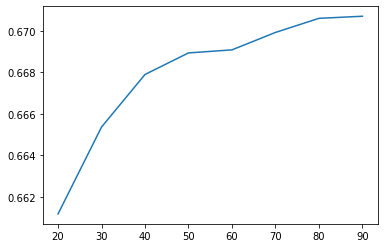

In [ ]:
plt.plot(ks, accs)
plt.show()

In [ ]:
max(accs)

0.6707031495020316

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y)
#preds = clf.predict(X_test)
print("Testing accuracy: ", clf.score(X_test, y_))

Testing accuracy:  0.6731424628701658


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y)
#preds = clf.predict(X_test)
print("Testing accuracy: ", str(rf.score(X_test, y_)))

Testing accuracy:  0.669950447091293


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, np.argmax(y_train, axis=1))
print("Testing accuracy: ", str(clf.score(X_test, np.argmax(y_test, axis=1))))

Testing accuracy:  0.6087271662845076
